# Modest approach for rough SABR model


Notebook calibrates rough SABR model using modest approach, idea originally taken from Teichmann's notebook.
Steps are the following:

1) Select moneyness-ttm grid. Generate a lot of random parameters and observables for rSABR model.

2) For every model get the option prices on the grid using Monte Carlo method.
Convert prices to implied volatility using SOR_TS function.

3) Train NN from parameters to implied volatilities.

4) Look at real historical data and find the parameters (not observables!), which minimize the loss.
For optimization problem differential evolution algorithm is used.

Notebook created by atukallo.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import itertools
import functools
import sys

from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

from src.rough_simulations import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
n = 1000
m = 10000
maturity_times = [1, 2, 3, 4, 5]
moneynesses = [0.8, 0.9, 0.95, 1., 1.05, 1.10, 1.20]

log_spot_price = 5
inst_vola = 1
inst_vola_of_vola = 0.1
vola_of_vola = 0.07
correlation = 0.1
local_vola = lambda t, log_price: 1
alpha = -0.4
is_call_option = True

In [110]:
# option_prices = get_option_prices_rough_SABR(n, m, maturity_times, moneynesses,
#                                              log_spot_price, inst_vola, inst_vola_of_vola, vola_of_vola,
#                                              correlation, local_vola, alpha, is_call_option)

implied_volas = get_implied_vola_rough_SABR(n, m, maturity_times, moneynesses,
                                             log_spot_price, inst_vola, inst_vola_of_vola, vola_of_vola,
                                             correlation, local_vola, alpha, is_call_option)

30.388579156565957 148.4131591025766 118.73052728206129 1 c
17.660803936968914 148.4131591025766 133.57184319231894 1 c
12.499166497673915 148.4131591025766 140.99250114744777 1 c
8.44965859988365 148.4131591025766 148.4131591025766 1 c
5.565937206918411 148.4131591025766 155.83381705770543 1 c
3.6506848412063744 148.4131591025766 163.25447501283426 1 c
1.640348133256491 148.4131591025766 178.09579092309193 1 c
31.723330393928126 148.4131591025766 118.73052728206129 2 c
20.523101114763367 148.4131591025766 133.57184319231894 2 c
16.035084616086344 148.4131591025766 140.99250114744777 2 c
12.389373834873334 148.4131591025766 148.4131591025766 2 c
9.511829646656558 148.4131591025766 155.83381705770543 2 c
7.2782287572064615 148.4131591025766 163.25447501283426 2 c
4.300600270756072 148.4131591025766 178.09579092309193 2 c
33.503687807965655 148.4131591025766 118.73052728206129 3 c
23.299239435098126 148.4131591025766 133.57184319231894 3 c
19.161338419775113 148.4131591025766 140.9925011

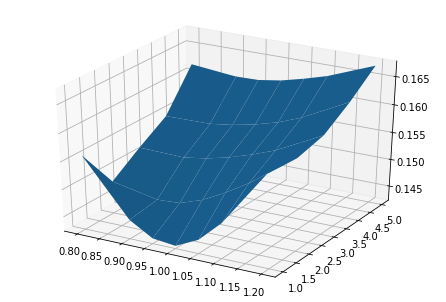

In [111]:
x, y = np.meshgrid(moneynesses, maturity_times)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, implied_volas)


In [25]:
x.shape


(7, 5)